In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
mortality_ca = pd.read_csv("Resources/mortality_2006_2010_clean.csv")
pollution_ca = pd.read_csv("Resources/pollution_2006_2010.csv")

In [3]:
diseases = mortality_ca["ICD-10 113 Cause List"].unique().tolist()
print(diseases, len(diseases))

['Influenza and pneumonia (J09-J18)', 'Pneumonia (J12-J18)', 'Chronic lower respiratory diseases (J40-J47)', 'Bronchitis, chronic and unspecified (J40-J42)', 'Emphysema (J43)', 'Asthma (J45-J46)', 'Other chronic lower respiratory diseases (J44,J47)', 'Pneumonitis due to solids and liquids (J69)', 'Other diseases of respiratory system (J00-J06,J30- J39,J67,J70-J98)', 'Influenza (J09-J11)'] 10


In [4]:
counties_list = pollution_ca["County"].unique().tolist()
print(counties_list, len(counties_list))

['Contra Costa', 'Humboldt', 'Imperial', 'Los Angeles', 'Orange', 'Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Cruz', 'Solano', 'Alameda', 'Fresno', 'Santa Clara'] 16


In [5]:
clrd_mortality = mortality_ca[mortality_ca["ICD-10 113 Cause List"] == 
                                         "Chronic lower respiratory diseases (J40-J47)"]
# clrd_mortality.head()

In [6]:
grouped_clrd = clrd_mortality.groupby(["County", "Year"])["Deaths"].agg([np.sum])
grouped_clrd1 = grouped_clrd.rename(columns={"sum": "Death"})
grouped_clrd1

Death
County  Year       
Alameda 2006  422.0
        2007  405.0
        2008  455.0
        2009  419.0
        2010  399.0
...             ...
Solano  2006  143.0
        2007  127.0
        2008  125.0
        2009  137.0
        2010  163.0

[80 rows x 1 columns]

In [7]:
pollutants_sb = pollution_ca[pollution_ca["County"] == "San Bernardino"]
# pollutants_sb

In [8]:
no2_pollutants_sb = pollutants_sb.groupby(["County", "Year"])["NO2 AQI"].agg([np.sum])
no2_pollutants_sb1 = no2_pollutants_sb.rename(columns={"sum": "NO2 AQI"})
no2_pollutants_sb1

NO2 AQI
County         Year         
San Bernardino 2006    55304
               2007    51852
               2008   101552
               2009   101196
               2010    82180

In [9]:
clrd_deaths_sb = grouped_clrd1.filter(like="San Bernardino", axis=0)
clrd_deaths_sb

Death
County         Year       
San Bernardino 2006  832.0
               2007  737.0
               2008  823.0
               2009  794.0
               2010  831.0

In [10]:
sb_merged = pd.merge(no2_pollutants_sb1, clrd_deaths_sb, on="Year")
sb_merged1 = sb_merged.reset_index()
sb_merged2 = sb_merged1.rename(columns={"Death": "San Bernardino"})
sb_merged2

,Year,NO2 AQI,San Bernardino
0,2006,55304,832.0
1,2007,51852,737.0
2,2008,101552,823.0
3,2009,101196,794.0
4,2010,82180,831.0


In [11]:
def line_plots(s):
    x = s["Year"]
    y1 = s[s.columns[1]] 
    y2 = s[s.columns[2]]
    fig, ax = plt.subplots()
    ax.plot(x, y1, color="blue", marker="o")

    ax2 = ax.twinx()
    ax2.plot(x, y2, color="red", marker="o")

    ax.xaxis.set_ticks(x)
    ax.set_xlabel("Year")
    ax.set_ylabel(f"Total {s.columns[1]}")
    ax2.set_ylabel("Number of Deaths")

    red_patch = mpatches.Patch(color="blue", label=s.columns[1])
    blue_patch = mpatches.Patch(color="red", label="Deaths")
    plt.legend(handles=[red_patch, blue_patch], loc="best")

    plt.title(f"""
    Number of Chronic Lower Respiratory Diseases Deaths in {s.columns[2]} 
    vs Total {s.columns[1]} (Air Qualitity Index) | 2006-2010
    """)
    plt.show()
    plt.tight_layout()

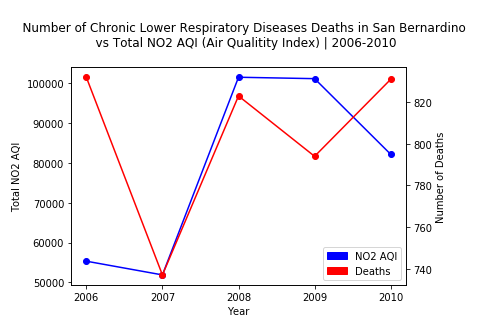

<Figure size 432x288 with 0 Axes>

In [12]:
line_plots(sb_merged2)

In [ ]:
# 'Contra Costa', 'Humboldt', 'Imperial', 'Los Angeles', 'Orange', 'Riverside', 
# 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Cruz', 
# 'Solano', 'Alameda', 'Fresno', 'Santa Clara'

In [13]:
o3_pollutants_sb = pollutants_sb.groupby(["County", "Year"])["O3 AQI"].agg([np.sum])
o3_pollutants_sb1 = o3_pollutants_sb.rename(columns={"sum": "O3 AQI"})
o3_pollutants_sb1

O3 AQI
County         Year        
San Bernardino 2006   70000
               2007   70276
               2008  155460
               2009  150384
               2010  104866

In [14]:
sb_merged_o3 = pd.merge(o3_pollutants_sb1, clrd_deaths_sb, on="Year")
sb_merged_o3_1 = sb_merged_o3.reset_index()
sb_merged_o3_2 = sb_merged_o3_1.rename(columns={"Death": "San Bernardino"})
sb_merged_o3_2

,Year,O3 AQI,San Bernardino
0,2006,70000,832.0
1,2007,70276,737.0
2,2008,155460,823.0
3,2009,150384,794.0
4,2010,104866,831.0


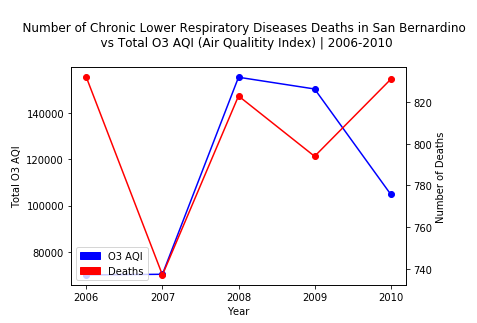

<Figure size 432x288 with 0 Axes>

In [15]:
line_plots(sb_merged_o3_2)

In [16]:
so2_pollutants_sb = pollutants_sb.groupby(["County", "Year"])["SO2 AQI"].agg([np.sum])
so2_pollutants_sb1 = so2_pollutants_sb.rename(columns={"sum": "SO2 AQI"})
so2_pollutants_sb1

SO2 AQI
County         Year         
San Bernardino 2006   2812.0
               2007   2172.0
               2008   4166.0
               2009   3110.0
               2010   2806.0

In [17]:
sb_merged_so2 = pd.merge(so2_pollutants_sb1, clrd_deaths_sb, on="Year")
sb_merged_so2_1 = sb_merged_so2.reset_index()
sb_merged_so2_2 = sb_merged_so2_1.rename(columns={"Death": "San Bernardino"})
sb_merged_so2_2

,Year,SO2 AQI,San Bernardino
0,2006,2812.0,832.0
1,2007,2172.0,737.0
2,2008,4166.0,823.0
3,2009,3110.0,794.0
4,2010,2806.0,831.0


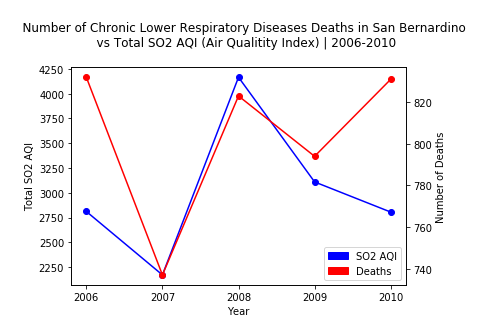

<Figure size 432x288 with 0 Axes>

In [18]:
line_plots(sb_merged_so2_2)

In [19]:
co_pollutants_sb = pollutants_sb.groupby(["County", "Year"])["CO AQI"].agg([np.sum])
co_pollutants_sb1 = co_pollutants_sb.rename(columns={"sum": "CO AQI"})
co_pollutants_sb1

CO AQI
County         Year        
San Bernardino 2006  4384.0
               2007  3380.0
               2008  8204.0
               2009  8162.0
               2010  6598.0

In [20]:
sb_merged_co = pd.merge(co_pollutants_sb1, clrd_deaths_sb, on="Year")
sb_merged_co_1 = sb_merged_co.reset_index()
sb_merged_co_2 = sb_merged_co_1.rename(columns={"Death": "San Bernardino"})
sb_merged_co_2

,Year,CO AQI,San Bernardino
0,2006,4384.0,832.0
1,2007,3380.0,737.0
2,2008,8204.0,823.0
3,2009,8162.0,794.0
4,2010,6598.0,831.0


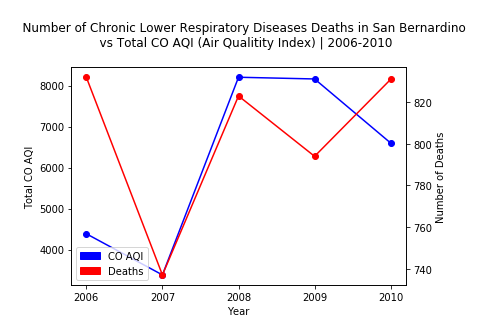

<Figure size 432x288 with 0 Axes>

In [21]:
line_plots(sb_merged_co_2)

In [22]:
sb_merged2

,Year,NO2 AQI,San Bernardino
0,2006,55304,832.0
1,2007,51852,737.0
2,2008,101552,823.0
3,2009,101196,794.0
4,2010,82180,831.0


In [23]:
sb_merged_o3_2

,Year,O3 AQI,San Bernardino
0,2006,70000,832.0
1,2007,70276,737.0
2,2008,155460,823.0
3,2009,150384,794.0
4,2010,104866,831.0


In [24]:
sb_merged_so2_2

,Year,SO2 AQI,San Bernardino
0,2006,2812.0,832.0
1,2007,2172.0,737.0
2,2008,4166.0,823.0
3,2009,3110.0,794.0
4,2010,2806.0,831.0


In [25]:
sb_merged_co_2

,Year,CO AQI,San Bernardino
0,2006,4384.0,832.0
1,2007,3380.0,737.0
2,2008,8204.0,823.0
3,2009,8162.0,794.0
4,2010,6598.0,831.0


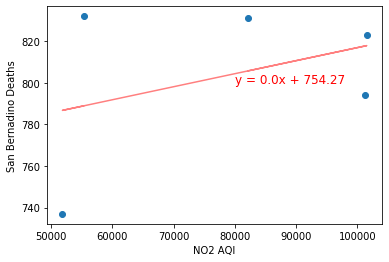

,Year,NO2 AQI,San Bernardino
Year,1.000000,0.678589,0.216375
NO2 AQI,0.678589,1.000000,0.374452
San Bernardino,0.216375,0.374452,1.000000


In [34]:
# NO2
x_values = sb_merged2["NO2 AQI"]
y_values = sb_merged2["San Bernardino"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.5)
plt.annotate(line_eq,(80000,800),fontsize=12,color="red")
plt.xlabel("NO2 AQI")
plt.ylabel("San Bernadino Deaths")
plt.show()

corr = sb_merged2.corr(method="pearson")
corr
# corr
# correlation = corr.loc["mean"][0]

In [36]:
print(f"The r-value for Nitrogen Dioxide (NO2) for San Bernardino is: {rvalue}")

The r-value for Nitrogen Dioxide (NO2) for San Bernardino is: 0.37445246217869715
